In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
import platform

# matplotlib 한글꺠짐 처리
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System OS")

In [2]:
from sklearn.datasets import load_iris
ds_iris = load_iris()
df_iris = pd.DataFrame(ds_iris['data'], columns=ds_iris['feature_names'])
df_iris['iris_name'] = [ds_iris['target_names'][x] for x in ds_iris['target']]
df_iris = df_iris.rename({'sepal length (cm)': 'sepal_length',
                          'sepal width (cm)': 'sepal_width',
                          'petal length (cm)': 'petal_length',
                          'petal width (cm)': 'petal_width'}, axis='columns')
print(df_iris.head())

   sepal_length  sepal_width  petal_length  petal_width iris_name
0           5.1          3.5           1.4          0.2    setosa
1           4.9          3.0           1.4          0.2    setosa
2           4.7          3.2           1.3          0.2    setosa
3           4.6          3.1           1.5          0.2    setosa
4           5.0          3.6           1.4          0.2    setosa


In [3]:
# 학습데이터, 시험데이터, 검증데이터로 나누기위해서 데이터를 섞음
df_is = df_iris.sample(frac=1)  # frac=1 : 모든 데이터를 랜덤하게 섞음
print(df_is.head())

     sepal_length  sepal_width  petal_length  petal_width   iris_name
111           6.4          2.7           5.3          1.9   virginica
34            4.9          3.1           1.5          0.2      setosa
140           6.7          3.1           5.6          2.4   virginica
66            5.6          3.0           4.5          1.5  versicolor
21            5.1          3.7           1.5          0.4      setosa


In [4]:
# 학습데이터, 시험데이터, 검증데이터 준비
# 학습데이터, 시험데이터, 검증데이터 비율 - 60:20:20
df_it = df_is.iloc[0:120, :]  # 학습데이터-90, 시험데이터-30
print(df_it.head())

     sepal_length  sepal_width  petal_length  petal_width   iris_name
111           6.4          2.7           5.3          1.9   virginica
34            4.9          3.1           1.5          0.2      setosa
140           6.7          3.1           5.6          2.4   virginica
66            5.6          3.0           4.5          1.5  versicolor
21            5.1          3.7           1.5          0.4      setosa


In [5]:
df_iv = df_is.iloc[120:, :]  # 검증데이터-30
print(df_iv.head())

     sepal_length  sepal_width  petal_length  petal_width   iris_name
59            5.2          2.7           3.9          1.4  versicolor
3             4.6          3.1           1.5          0.2      setosa
50            7.0          3.2           4.7          1.4  versicolor
137           6.4          3.1           5.5          1.8   virginica
40            5.0          3.5           1.3          0.3      setosa


In [6]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# 학습 데이터와 시험 데이터로 나눔 - 비율은 생략시 75% : 25%
# test_size=.25 는 학습데이터 0.75 - 90개, 시험데이터 0.25 - 30개
# train_data, test_data, train_label, test_label = \
# train_test_split(df_it[df_it.columns[0:4]], df_it[df_it.columns[4]], test_size=.25) 
train_data, test_data, train_label, test_label = \
 train_test_split(df_it[df_it.columns[0:4]], df_it[df_it.columns[4]])

# 난수 시드 고정
np.random.seed(202005)

# 데이터 학습
clf = svm.SVC()  # 분류기 - 서포트벡터머신 사용
clf.fit(train_data, train_label)

# 데이터 예측
pre = clf.predict(test_data)

# 정답률 구함
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.9666666666666667


In [7]:
# 학습결과를 파일로 저장
from sklearn.externals import joblib
joblib.dump(clf, "iris_model.joblib")

C:\Users\KEO\Anaconda3\envs\workpy\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['iris_model.joblib']

In [8]:
# 저장된 학습결과를 불러와서 검증데이터에 적용: 학습 검증
iris_pre = joblib.load("iris_model.joblib")
result = iris_pre.predict(df_iv[df_iv.columns[0:4]])
true_data = df_iv[df_iv.columns[4]].values

# 판별한 결과 중 일부 출력해 봄
for i in range(20):
    print("predict : " + result[i] + " - " + "True : " + true_data[i])

# 판별한 결과로 정답률 계산
rlist = 0
for i in range(result.size):
    if(result[i] == true_data[i]):
        rlist += 1

tr = rlist / result.size

print("Ture rate : " + str(tr))


predict : versicolor - True : versicolor
predict : setosa - True : setosa
predict : versicolor - True : versicolor
predict : virginica - True : virginica
predict : setosa - True : setosa
predict : versicolor - True : versicolor
predict : versicolor - True : virginica
predict : setosa - True : setosa
predict : versicolor - True : virginica
predict : versicolor - True : versicolor
predict : setosa - True : setosa
predict : versicolor - True : versicolor
predict : versicolor - True : versicolor
predict : virginica - True : virginica
predict : virginica - True : virginica
predict : setosa - True : setosa
predict : virginica - True : virginica
predict : versicolor - True : versicolor
predict : versicolor - True : versicolor
predict : versicolor - True : versicolor
Ture rate : 0.8666666666666667


In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

np.random.seed(202005)  # 재현성확보에 필요

# 분류기 이름 -> (선 스타일, 분류기 인스턴스)
map_classifier = {
        '로지스틱 회귀': LogisticRegression(),
        '나이브 베이즈': GaussianNB(),
        '디시전 트리': DecisionTreeClassifier(max_depth=5),
        '랜덤 포레스트': RandomForestClassifier(max_depth=5, n_estimators=10,
                                          max_features=1),
        '서포트벡터머신': SVC(probability=True)
}

# 데이터프레임 행을 학습/시험셋으로 나눈다.
data, label = df_iris[df_iris.columns[:4]], df_iris[df_iris.columns[4]]
train_data, test_data, train_label, test_label = train_test_split(data, label)

print('분류기 성능 비교')
for c_name, model in map_classifier.items():
    model.fit(train_data, train_label)
    # 열마다 True/False 예측값을 저장한다.
    preds = model.predict_proba(test_data)	 # 모양: (120, 2)
    pre = model.predict(test_data)
    pred = pd.Series(preds[:, 1])
    ac_score = metrics.accuracy_score(test_label, pre)
    print("분류기: {0:5s}, 정답률 = {1:.5f}".format(c_name, ac_score))

분류기 성능 비교
분류기: 로지스틱 회귀, 정답률 = 0.94737
분류기: 나이브 베이즈, 정답률 = 0.92105
분류기: 디시전 트리, 정답률 = 0.94737
분류기: 랜덤 포레스트, 정답률 = 0.94737
분류기: 서포트벡터머신, 정답률 = 0.94737


In [10]:
print(train_data)

     sepal_length  sepal_width  petal_length  petal_width
109           7.2          3.6           6.1          2.5
125           7.2          3.2           6.0          1.8
76            6.8          2.8           4.8          1.4
82            5.8          2.7           3.9          1.2
49            5.0          3.3           1.4          0.2
..            ...          ...           ...          ...
19            5.1          3.8           1.5          0.3
142           5.8          2.7           5.1          1.9
95            5.7          3.0           4.2          1.2
27            5.2          3.5           1.5          0.2
111           6.4          2.7           5.3          1.9

[112 rows x 4 columns]


In [11]:
print(test_data)

     sepal_length  sepal_width  petal_length  petal_width
71            6.1          2.8           4.0          1.3
77            6.7          3.0           5.0          1.7
149           5.9          3.0           5.1          1.8
66            5.6          3.0           4.5          1.5
2             4.7          3.2           1.3          0.2
114           5.8          2.8           5.1          2.4
140           6.7          3.1           5.6          2.4
0             5.1          3.5           1.4          0.2
141           6.9          3.1           5.1          2.3
34            4.9          3.1           1.5          0.2
57            4.9          2.4           3.3          1.0
70            5.9          3.2           4.8          1.8
105           7.6          3.0           6.6          2.1
42            4.4          3.2           1.3          0.2
92            5.8          2.6           4.0          1.2
144           6.7          3.3           5.7          2.5
117           

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

np.random.seed(202005)  # 재현성확보에 필요

# 분류기 이름 -> (선 스타일, 분류기 인스턴스)
map_classifier = {
        '로지스틱 회귀': LogisticRegression(),
        '나이브 베이즈': GaussianNB(),
        '디시전 트리': DecisionTreeClassifier(max_depth=5),
        '랜덤 포레스트': RandomForestClassifier(max_depth=5, n_estimators=10,
                                          max_features=1),
        '서포트벡터머신': SVC(probability=True)
}

# 데이터프레임 행을 학습/시험셋으로 나눈다. 데이터는 자동으로 랜덤하게 섞어서 나눔
data, label = df_iris[df_iris.columns[:4]], df_iris[df_iris.columns[4]]
train_data, test_data, train_label, test_label = train_test_split(data, label)

print('분류기 성능 비교')
for c_name, model in map_classifier.items():
    model.fit(train_data, train_label)
    # 열마다 True/False 예측값을 저장한다.
    preds = model.predict_proba(test_data)	 # 모양: (120, 2)
    pre = model.predict(test_data)
    pred = pd.Series(preds[:, 1])
    ac_score = metrics.accuracy_score(test_label, pre)
    print("분류기: {0:5s}, 정답률 = {1:.5f}".format(c_name, ac_score))

분류기 성능 비교
분류기: 로지스틱 회귀, 정답률 = 0.94737
분류기: 나이브 베이즈, 정답률 = 0.92105
분류기: 디시전 트리, 정답률 = 0.94737
분류기: 랜덤 포레스트, 정답률 = 0.94737
분류기: 서포트벡터머신, 정답률 = 0.94737


로지스틱 회귀: auc=0.998417
나이브 베이즈: auc=0.960114
디시전 트리: auc=0.860399
랜덤 포레스트: auc=0.972934
서포트벡터머신: auc=0.994302


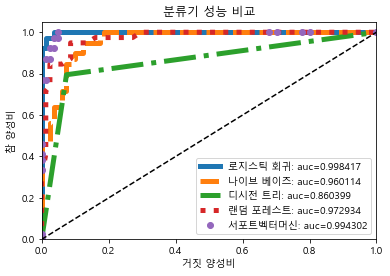

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

np.random.seed(202005)  # 재현성확보에 필요

# 분류기 이름 -> (선 스타일, 분류기 인스턴스)
map_classifier = {
        '로지스틱 회귀': ('-', LogisticRegression()),
        '나이브 베이즈': ('--', GaussianNB()),
        '디시전 트리': ('-.', DecisionTreeClassifier()),
        '랜덤 포레스트': (':', RandomForestClassifier()),
        '서포트벡터머신': ('o', SVC(probability=True))
}

# 데이터프레임 행을 학습/시험셋으로 나눈다.
data, label = df_iris[df_iris.columns[:3]], (df_iris['iris_name'] == 'virginica')
train_data, test_data, train_label, test_label = \
    train_test_split(data, label, test_size=.8)

for c_name, (line_s, model) in map_classifier.items():
    model.fit(train_data, train_label)
    # 열마다 True/False 예측값을 저장한다.
    preds = model.predict_proba(test_data)	 # 모양: (120, 2)
    pred = pd.Series(preds[:, 1])
    fpr, tpr, thresholds = roc_curve(test_label, pred)
    auc_score = auc(fpr, tpr)
    label = '%s: auc=%f' % (c_name, auc_score)
    plt.plot(fpr, tpr, line_s, linewidth=5, label=label)
    print(label)

plt.legend(loc="lower right")
plt.title('분류기 성능 비교')

plt.plot([0, 1], [0, 1], 'k--')  # x=y line.  Visual aid
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()

In [14]:
# 버섯 종류 구분
# 1. mushroom 데이터 다운로드
import urllib.request as req

data = "data/mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, data)
print("done")

done


In [15]:
# 2. 전처리, 문자데이터를 숫자로 변환하기
# (1) 데이터로드
df_mr = pd.read_csv("data/mushroom.csv", header=None)

label_mr = []
data_mr = []

# (2) 분류기 학습을 위해 기호를 숫자로 변환
for row_index, row in df_mr.iterrows():
    label_mr.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data_mr.append(row_data)

In [16]:
# 3. 버섯종류 판별 모델링
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, metrics

np.random.seed(1909)  # 재현성확보에 필요
# (1) 모델 비교에 사용할 분류기 딕셔너리로 저장
# 분류기 이름 : (선 스타일, 분류기 인스턴스)
map_classifier = {
        '로지스틱 회귀': LogisticRegression(),
        '나이브 베이즈': GaussianNB(),
        '결정 트리': DecisionTreeClassifier(max_depth=5),
        '랜덤 포레스트': RandomForestClassifier(max_depth=5),
        'SVM': svm.SVC()
}

# (2) 학습 전용과 테스트 전용 데이터로 나누기
train_data, test_data, train_label, test_label = \
    train_test_split(data_mr, label_mr)

# 분류기 학습 및 비교
for name, model in map_classifier.items():
    # (3) 데이터 학습시키기
    model.fit(train_data, train_label)
    # (4) 데이터 예측하기
    predict = model.predict(test_data)
    # (5) 결과 테스트하기
    ac_score = metrics.accuracy_score(test_label, predict)
    cl_report = metrics.classification_report(test_label, predict)
    print("분류기 :", name)
    print("정답률 =", ac_score)
    print("리포트 =\n", cl_report)

C:\Users\KEO\Anaconda3\envs\workpy\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


분류기 : 로지스틱 회귀
정답률 = 0.9419005416051206
리포트 =
               precision    recall  f1-score   support

           e       0.94      0.95      0.94      1037
           p       0.95      0.93      0.94       994

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031

분류기 : 나이브 베이즈
정답률 = 0.9020187099950763
리포트 =
               precision    recall  f1-score   support

           e       0.94      0.87      0.90      1037
           p       0.87      0.94      0.90       994

    accuracy                           0.90      2031
   macro avg       0.90      0.90      0.90      2031
weighted avg       0.90      0.90      0.90      2031

분류기 : 결정 트리
정답률 = 0.9763663220088626
리포트 =
               precision    recall  f1-score   support

           e       0.99      0.97      0.98      1037
           p       0.97      0.99      0.98       994

    accuracy                           0.98   

In [17]:
# 4. 버섯종류 판별 학습
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

np.random.seed(1909)  # 재현성확보에 필요

# (3) 학습 전용과 테스트 전용 데이터로 나누기
train_data, test_data, train_label, test_label = \
    train_test_split(data_mr, label_mr)
# 데이터 학습
model = svm.SVC()
model.fit(train_data, train_label)
# 데이터 예측
predict = model.predict(test_data)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(test_label, predict)
cl_report = metrics.classification_report(test_label, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9955686853766618
리포트 =
               precision    recall  f1-score   support

           e       0.99      1.00      1.00      1037
           p       1.00      0.99      1.00       994

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
# 5. 버섯종류 판별 학습결과 저장
from sklearn.externals import joblib
joblib.dump(model, "mushroom.joblib")

['mushroom.joblib']

In [19]:
# 6. 파일로 저장된 학습결과로 판별하기
mushroom_pre = joblib.load("mushroom.joblib")
result = mushroom_pre.predict(train_data)
true_dat = train_label

rlist = 0
for i in range(result.size):
    if(result[i] == true_dat[i]):
        rlist += 1

tr = rlist / result.size

print("Ture rate : " + str(tr))

Ture rate : 0.9954045626128344


In [20]:
# 회귀분석 - 당뇨병 진행 예측
# 1. 데이터 획득
import sklearn.datasets
from sklearn.preprocessing import normalize

diabetes = sklearn.datasets.load_diabetes()
X = normalize(diabetes['data'])
Y = diabetes['target']

In [21]:
# mape를 구하는 mean_absolute_percentage_error() 함수 작성
import numpy as np


def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100



선형 회귀
상관 계수: 0.706 결정 계수-R2: 0.492
선형 계수:
[  4.06759078 -34.40498059  73.58908943  48.88181208 -62.0386444
  22.15833163   9.72470579  53.31658404  92.71574252   7.34641601]
MAPE: 37.2626328305773 RMSE: 2972.7213991781914


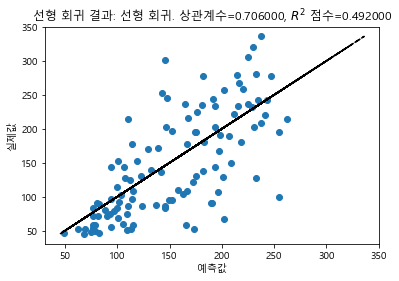



라쏘 회귀
상관 계수: 0.709 결정 계수-R2: 0.493
선형 계수:
[  0.         -19.24000039  71.54893135  40.38645081  -0.
  -0.         -25.65915874   7.241206    77.96700382   0.18507012]
MAPE: 39.26331891492654 RMSE: 2965.2592192423394


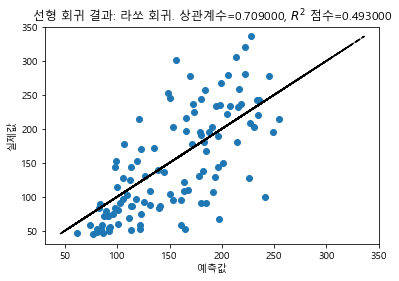



릿지 회귀
상관 계수: 0.708 결정 계수-R2: 0.497
선형 계수:
[  4.34519512 -33.23538977  72.10305034  47.47460233 -12.15161521
 -13.35777651 -16.30367813  40.6643456   74.8507446    8.19175345]
MAPE: 37.197437905020934 RMSE: 2946.8571652918517


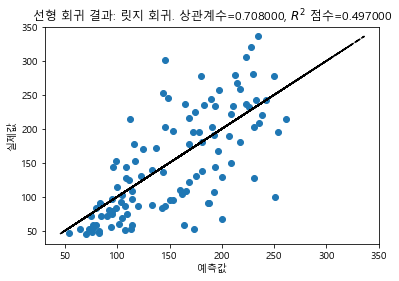



엘라스틱 넷 회귀
상관 계수: 0.685 결정 계수-R2: 0.254
선형 계수:
[ 4.41195679 -2.43918242 17.6083608  12.74459053  3.90560305  1.1319636
 -9.44909646 10.43901954 18.07971686  7.79347749]
MAPE: 55.92480062817581 RMSE: 4366.658132286789


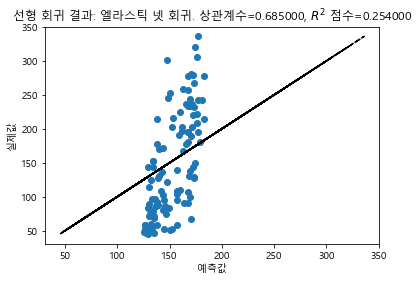



서포트 벡터 회귀
상관 계수: 0.686 결정 계수-R2: 0.206
MAPE: 51.67384376350266 RMSE: 4645.570127457102


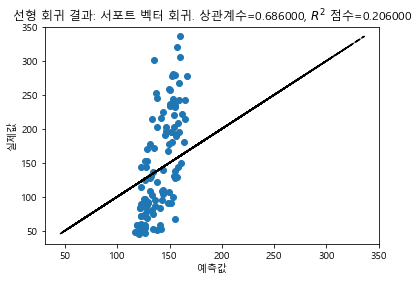



랜덤 포레스트 회귀
상관 계수: 0.638 결정 계수-R2: 0.4
MAPE: 39.6561378668203 RMSE: 3510.4006438811507


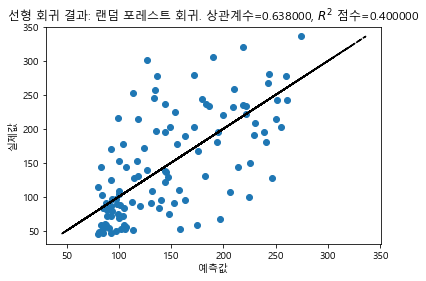

In [23]:
# 2. 모델링
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

np.random.seed(190811)  # 재현성확보에 필요
# (1) 모델링에 사용할 모델
map_regression = {
        '선형 회귀': LinearRegression(),
        '라쏘 회귀': Lasso(),
        '릿지 회귀': Ridge(),
        '엘라스틱 넷 회귀': ElasticNet(),
        '서포트 벡터 회귀': SVR(C=1.0, epsilon=0.2),
        '랜덤 포레스트 회귀': RandomForestRegressor(max_depth=5)
}

# 학습 전용과 테스트 전용 데이터로 나누기
train_X, test_X, train_Y, test_Y = train_test_split(X, Y)

# 데이터 학습
for name, model in map_regression.items():
    # (3) 데이터 학습
    model.fit(train_X, train_Y)
    # (4) 데이터 예측
    predict = model.predict(test_X)
    # (5) 결과 테스트
    corr = round(pd.Series(predict).corr(pd.Series(test_Y)), 3)
    rsquared = round(r2_score(test_Y, predict), 3)
    print("\n")
    print(name)
    print("상관 계수:", corr, "결정 계수-R2:", rsquared)
    if(name not in ['서포트 벡터 회귀', '랜덤 포레스트 회귀']):
        print("선형 계수:")
        print(model.coef_)
    
    #머신러닝 회귀분석 예측모델 평가
    mape = mean_absolute_percentage_error(test_Y, predict)
    rmse = mean_squared_error(test_Y, predict)
    print("MAPE:", mape, "RMSE:", rmse)
    
    # 시각화
    plt.scatter(predict, test_Y)
    plt.title("선형 회귀 결과: %s. 상관계수=%f, $R^2$ 점수=%f" % (name, corr, rsquared))
    plt.xlabel("예측값")
    plt.ylabel("실제값")
    # 비교를 위해 x=y 라인 추가
    plt.plot(test_Y , test_Y , 'k--')
    plt.show()